In [213]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from scipy.io import loadmat
from sklearn import model_selection
from dtuimldmtools import rlr_validate
from sklearn.preprocessing import StandardScaler

# Regression part a)

We wish to predict the target variable through our regression. This is the variable describing how the disease has developed one year after the other measurements were taken.

In [214]:
X,y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)
all_attributes = pd.concat([X,y], axis=1)
sex = X['sex'].copy()
sex = sex.replace({1: 'male', 2: 'female'})
all_attributes.rename(columns={'s1':'tc', 's2': 'ldl', 's3': 'hdl', 's4': 'tch', 's5': 'ltg', 's6': 'glu'}, inplace=True)
all_attributes["sex"].replace({1:1,2:0},inplace=True)

all_attributes

C:\Users\canic\AppData\Local\Temp\ipykernel_9280\3233146687.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_attributes["sex"].replace({1:1,2:0},inplace=True)


,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,59.0,0.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,0.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,0.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,0.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,0.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [215]:
((all_attributes - all_attributes.mean()) / all_attributes.std())

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.799594,-1.064282,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569,-0.014703
1,-0.039522,0.937474,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285,-1.000525
2,1.791277,-1.064282,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537,-0.144416
3,-1.870322,0.937474,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600,0.698721
4,0.113044,0.937474,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458,-0.222244
...,...,...,...,...,...,...,...,...,...,...,...
437,0.875877,-1.064282,0.412892,1.254619,-0.119633,-0.053896,-0.602160,-0.054438,0.655045,0.151337,0.335524
438,-0.115806,-1.064282,-0.334032,-1.420477,1.036167,1.662471,-0.602160,0.720486,-0.380388,0.934195,-0.624356
439,0.875877,-1.064282,-0.334032,0.363161,-0.784218,-0.290636,-0.524846,-0.232670,-0.984533,0.325305,-0.261158
440,-0.954922,0.937474,0.820305,0.025521,0.342687,0.320943,-0.602160,0.557752,0.935103,-0.544537,0.880320


In [216]:
# Standardize:
X_s = ((X - X.mean()) / X.std())
X_s

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.799594,1.064282,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569
1,-0.039522,-0.937474,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285
2,1.791277,1.064282,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537
3,-1.870322,-0.937474,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600
4,0.113044,-0.937474,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458
...,...,...,...,...,...,...,...,...,...,...
437,0.875877,1.064282,0.412892,1.254619,-0.119633,-0.053896,-0.602160,-0.054438,0.655045,0.151337
438,-0.115806,1.064282,-0.334032,-1.420477,1.036167,1.662471,-0.602160,0.720486,-0.380388,0.934195
439,0.875877,1.064282,-0.334032,0.363161,-0.784218,-0.290636,-0.524846,-0.232670,-0.984533,0.325305
440,-0.954922,-0.937474,0.820305,0.025521,0.342687,0.320943,-0.602160,0.557752,0.935103,-0.544537


In [217]:
N,M = X.shape

In [218]:
# Load dataset from sklearn
X,y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)

# Convert to pandas dataframe
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# # Standardize data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Rename columns
X.rename(columns={'s1':'tc', 's2': 'ldl', 's3': 'hdl', 's4': 'tch', 's5': 'ltg', 's6': 'glu'}, inplace=True)

# Add Offset
X['Offset'] = 1

# Move offset to first position
cols = X.columns.tolist()
cols = cols[-1:] + cols[:-1]
X = X[cols]

# Number of samples and features: N = samples, M = features
N, M = X.shape

# attribute names
attributeNames = X.columns

# Convert pandas dataframe to numpy array
X = X.to_numpy()
y = y.to_numpy().flatten()

In [219]:
## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(K, shuffle=True)
# Values of lambda
lambdas = np.power(10.0, range(-10, 11))


In [220]:
Error_train = np.empty((K, 1))
Error_test = np.empty((K, 1))
Error_train_rlr = np.empty((K, 1))
Error_test_rlr = np.empty((K, 1))
Error_train_nofeatures = np.empty((K, 1))
Error_test_nofeatures = np.empty((K, 1))
w_rlr = np.empty((M, K))
mu = np.empty((K, M - 1))
sigma = np.empty((K, M - 1))
w_noreg = np.empty((M, K))

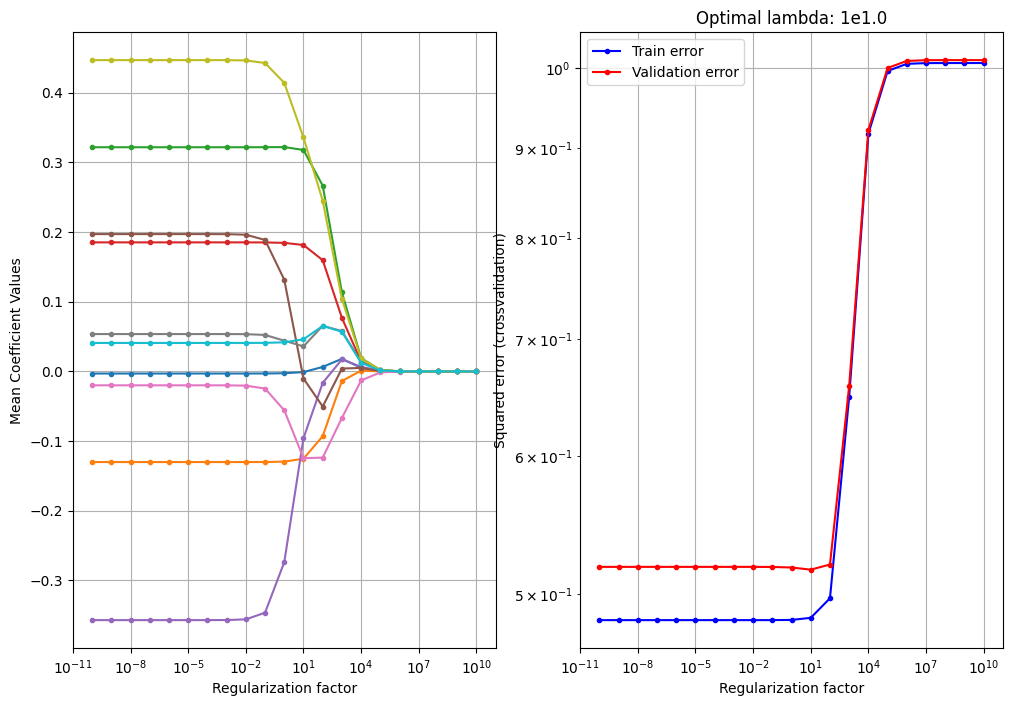

In [223]:
k = 0
for train_index, test_index in CV.split(X, y):
     # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10

    # Standardize the training and test sets within each fold
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    internal_cross_validation = 10

    (
        opt_val_err,
        opt_lambda,
        mean_w_vs_lambda,
        train_err_vs_lambda,
        test_err_vs_lambda,
    ) = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)
    # Standardize outer fold based on training set, and save the mean and standard
    # deviations since they're part of the model (they would be needed for
    # making new predictions) - for brevity we won't always store these in the scripts
    mu[k, :] = np.mean(X_train[:, 1:], 0)
    sigma[k, :] = np.std(X_train[:, 1:], 0)

    X_train[:, 1:] = (X_train[:, 1:] - mu[k, :]) / sigma[k, :]
    X_test[:, 1:] = (X_test[:, 1:] - mu[k, :]) / sigma[k, :]

    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Compute mean squared error without using the input data at all
    Error_train_nofeatures[k] = (
        np.square(y_train - y_train.mean()).sum(axis=0) / y_train.shape[0]
    )
    Error_test_nofeatures[k] = (
        np.square(y_test - y_test.mean()).sum(axis=0) / y_test.shape[0]
    )

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0, 0] = 0  # Do no regularize the bias term
    w_rlr[:, k] = np.linalg.solve(XtX + lambdaI, Xty).squeeze()
    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = (
        np.square(y_train - X_train @ w_rlr[:, k]).sum(axis=0) / y_train.shape[0]
    )
    Error_test_rlr[k] = (
        np.square(y_test - X_test @ w_rlr[:, k]).sum(axis=0) / y_test.shape[0]
    )

    # Estimate weights for unregularized linear regression, on entire training set
    w_noreg[:, k] = np.linalg.solve(XtX, Xty).squeeze()
    # Compute mean squared error without regularization
    Error_train[k] = (
        np.square(y_train - X_train @ w_noreg[:, k]).sum(axis=0) / y_train.shape[0]
    )
    Error_test[k] = (
        np.square(y_test - X_test @ w_noreg[:, k]).sum(axis=0) / y_test.shape[0]
    )
    # OR ALTERNATIVELY: you can use sklearn.linear_model module for linear regression:
    # m = lm.LinearRegression().fit(X_train, y_train)
    # Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    # Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Display the results for the last cross-validation fold
    if k == K - 1:
        plt.figure(k, figsize=(12, 8))
        plt.subplot(1, 2, 1)
        plt.semilogx(lambdas, mean_w_vs_lambda.T[:, 1:], ".-")  # Don't plot the bias term
        plt.xlabel("Regularization factor")
        plt.ylabel("Mean Coefficient Values")
        plt.grid()
        # You can choose to display the legend, but it's omitted for a cleaner
        # plot, since there are many attributes
        # legend(attributeNames[1:], loc='best')

        plt.subplot(1, 2, 2)
        plt.title("Optimal lambda: 1e{0}".format(np.log10(opt_lambda)))
        plt.loglog(
            lambdas, train_err_vs_lambda.T, "b.-", lambdas, test_err_vs_lambda.T, "r.-"
        )
        plt.xlabel("Regularization factor")
        plt.ylabel("Squared error (crossvalidation)")
        plt.legend(["Train error", "Validation error"])
        plt.grid()

    # To inspect the used indices, use these print statements
    # print('Cross validation fold {0}/{1}:'.format(k+1,K))
    # print('Train indices: {0}'.format(train_index))
    # print('Test indices: {0}\n'.format(test_index))

    k += 1

plt.show()


In [224]:
# Display results
print("Linear regression without feature selection:")
print("- Training error: {0}".format(Error_train.mean()))
print("- Test error:     {0}".format(Error_test.mean()))
print(
    "- R^2 train:     {0}".format(
        (Error_train_nofeatures.sum() - Error_train.sum())
        / Error_train_nofeatures.sum()
    )
)
print(
    "- R^2 test:     {0}\n".format(
        (Error_test_nofeatures.sum() - Error_test.sum()) / Error_test_nofeatures.sum()
    )
)
print("Regularized linear regression:")
print("- Training error: {0}".format(Error_train_rlr.mean()))
print("- Test error:     {0}".format(Error_test_rlr.mean()))
print(
    "- R^2 train:     {0}".format(
        (Error_train_nofeatures.sum() - Error_train_rlr.sum())
        / Error_train_nofeatures.sum()
    )
)
print(
    "- R^2 test:     {0}\n".format(
        (Error_test_nofeatures.sum() - Error_test_rlr.sum())
        / Error_test_nofeatures.sum()
    )
)

print("Weights in last fold:")
for m in range(M):
    print("{:>15} {:>15}".format(attributeNames[m], np.round(w_rlr[m, -1], 2)))


Linear regression without feature selection:
- Training error: 0.48004996019345425
- Test error:     0.5027096005255574
- R^2 train:     0.5187226949006313
- R^2 test:     0.48409740608105145

Regularized linear regression:
- Training error: 0.48141386106477224
- Test error:     0.505105757877838
- R^2 train:     0.5173553069406238
- R^2 test:     0.4816383645346256

Weights in last fold:
         Offset             0.0
            age            -0.0
            sex           -0.13
            bmi            0.32
             bp            0.18
             tc            -0.1
            ldl            -0.0
            hdl           -0.12
            tch            0.04
            ltg            0.34
            glu            0.05
